In [1]:
import scipy.constants as c
from IPython.display import display as print
from sympy import *
init_printing(use_latex="mathjax")

In [2]:
# Nr 1 (a)
sigma, epsilon, r, r_0, beta, k_B, T = symbols("sigma epsilon r r_0 beta k_B T",positive=True)
V = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
D_2 = V.diff(r,2).subs(r,2**(Rational(1,6))*sigma)
D_3 = V.diff(r,3).subs(r,2**(Rational(1,6))*sigma)
print(D_2,D_3)

    2/3  
36⋅2   ⋅ε
─────────
     2   
    σ    

-756⋅√2⋅ε 
──────────
     3    
    σ     

In [3]:
# (b)
weight = exp(-beta * D_2/2 * (r-r_0)**2) * (1 - beta * D_3/6 * (r-r_0)**3)
Z = Integral(weight, (r,-oo,oo)).doit()
rZ = simplify(Integral(r*weight, (r,-oo,oo)).doit().subs(r_0, 2**Rational(1,6)*sigma))
x_ev = simplify(rZ/Z)
print(Z,rZ,x_ev)

6 ___     
╲╱ 2 ⋅√π⋅σ
──────────
 6⋅√β⋅√ε  

3 ___     2             
╲╱ 2 ⋅√π⋅σ ⋅(48⋅β⋅ε + 7)
────────────────────────
          3/2  3/2      
     288⋅β   ⋅ε         

6 ___               
╲╱ 2 ⋅σ⋅(48⋅β⋅ε + 7)
────────────────────
       48⋅β⋅ε       

In [4]:
# (c)
alpha = 7*c.Boltzmann / (48 * 10e-3 * c.e)
alpha

0.0012566944340628387

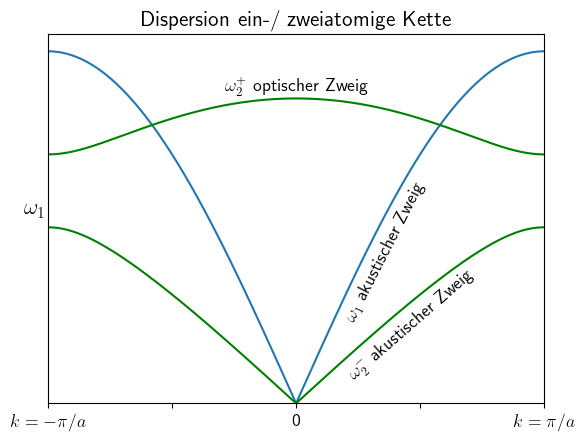

In [5]:
# Nr 2 (a)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
                     "text.usetex": True, "font.size": 13
                     })

k = np.linspace(-np.pi,np.pi,1000)
omega1 = np.sqrt(4 *np.sin(k/2)**2)
omega2optical = np.sqrt(3/2 + np.sqrt((3/2)**2 - 2*np.sin(k/2)**2))
omega2acoustic = np.sqrt(3/2 - np.sqrt((3/2)**2 - 2*np.sin(k/2)**2))

fig,ax = plt.subplots()
ax.plot(k, omega1)
ax.plot(k, omega2acoustic, c="g")
ax.plot(k, omega2optical,c="g")
plt.text(0,1.78, r"$\omega_2^+$ optischer Zweig",ha="center")
plt.text(1.44,0.14, r"$\omega_2^-$ akustischer Zweig",ha="center",rotation=41)
plt.text(1.12,0.47, r"$\omega_1$ akustischer Zweig",ha="center",rotation=63)
ax.set(ylim=(0,2.1),xlim=(-np.pi,np.pi),xticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi],xticklabels=[r"$k=-\pi/a$","","0","",r"$k=\pi/a$"],yticks=[],title="Dispersion ein-/ zweiatomige Kette")
ax.set_ylabel(r"$\omega_1$",rotation=0,labelpad=10,size=16)
fig.savefig("dispersion.pdf")

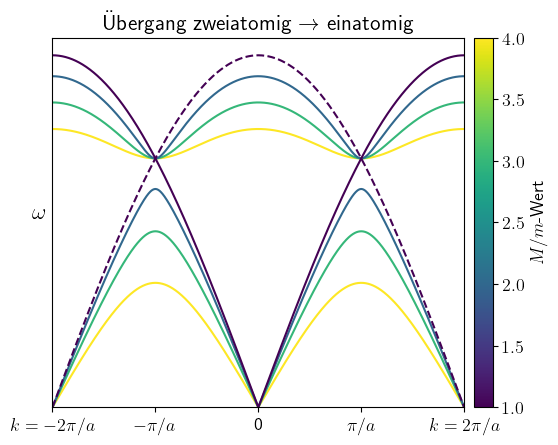

In [6]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap

M = [4, 2, 1.3, 1]
N = len(M)
cmap = plt.cm.viridis
c = cmap(np.linspace(1, 0, N))
k = np.linspace(-2*np.pi, 2*np.pi, 1000)

omega1 = lambda k,M: np.sqrt(4 *np.sin(k/2)**2)
omega2optical = lambda k,M: np.sqrt((1/M + 1) + np.sqrt(((1/M + 1))**2 - 4/M * np.sin(k/2)**2))
omega2acoustic = lambda k,M: np.sqrt((1/M + 1) - np.sqrt(((1/M + 1))**2 - 4/M * np.sin(k/2)**2))

fig, ax = plt.subplots()
for i in range(N-1):
    ax.plot(k, omega2acoustic(k,M[i]), c=c[i])
    ax.plot(k, omega2optical(k,M[i]), c=c[i])
ax.plot(k, omega1(k/2, M[-1]), c=c[-1])
ax.plot(k, omega1(k/2+np.pi, M[-1]), c=c[-1],linestyle="--")
ax.set(
    ylim=(0, 2.1),
    xlim=(- 2*np.pi, 2*np.pi),
    xticks=[-2*np.pi, -2*np.pi/2, 0, 2*np.pi/2, 2*np.pi],
    xticklabels=[r"$k=-2\pi/a$", r"$-\pi/a$", "0", r"$\pi/a$", r"$k=2\pi/a$"],
    yticks=[],
    title="Übergang zweiatomig $\\to$ einatomig"
)
ax.set_ylabel(r"$\omega$", rotation=0, labelpad=10, size=16)

sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(M), vmax=max(M)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("$M/m$-Wert")

fig.savefig("transition.pdf")
plt.show()


In [7]:
# Nr.3 (a)
D_1,D_2,m,M,a,k = symbols("D_1 D_2 m M a k", positive=True)
k = symbols("k")
omega = sqrt((D_1+D_2)/m - 1/m * sqrt(D_1**S(2) + D_2**S(2) + 2*D_1*D_2*cos(k*a)))
f = sqrt(D_1**2 + D_2**2 + 2*D_1*D_2*cos(a*k))
series(f,k,0,3)

   _____________________                 2  2                
  ╱   2               2           D₁⋅D₂⋅a ⋅k             ⎛ 3⎞
╲╱  D₁  + 2⋅D₁⋅D₂ + D₂   - ────────────────────────── + O⎝k ⎠
                                _____________________        
                               ╱   2               2         
                           2⋅╲╱  D₁  + 2⋅D₁⋅D₂ + D₂          

In [8]:
# Nr.4 (a)
import scipy.constants as c
a = 3.61e-10
v = 4300
omega_max = 2*v/a # THz
print(f"{omega_max*1e-12 = :.3} Hz")

# (b)
E_max = c.hbar*omega_max/c.e# meV
print(f"{E_max*1e3 = :.3} eV")

'omega_max*1e-12 = 23.8 Hz'

'E_max*1e3 = 15.7 eV'

In [9]:
# Nr.5 
lamb = 694e-9
n = 1.54
v = 6000

# (a)
k = n*2*np.pi/lamb
Delta_k = 2*n*2*np.pi/lamb
Delta_p = c.hbar * Delta_k
print(k,Delta_k,Delta_p)

# (b)
omega = v * Delta_k
print(omega)

# (c)
Delta_E_rel = omega / (2*np.pi*c.c/lamb)
print(Delta_E_rel)

13942514.94676738

27885029.89353476

2.940676665994236e-27

167310179361.20856

6.164264479261849e-05